## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import pandas as pd
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
import keras
from tensorflow.keras import optimizers

# Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

2023-04-02 23:54:19.088816: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df['NAME'].value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
drop = ['EIN', 'NAME']

application_df.drop(drop, axis = 1, inplace = True)

In [4]:
# Determine the number of unique values in each columns
print(application_df.apply(lambda col: len(col.unique())).sort_values(ascending = False))

ASK_AMT                   8747
CLASSIFICATION              71
APPLICATION_TYPE            17
INCOME_AMT                   9
AFFILIATION                  6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
SPECIAL_CONSIDERATIONS       2
IS_SUCCESSFUL                2
dtype: int64


In [5]:
# Look at APPLICATION_TYPE value counts for binning
types = application_df.APPLICATION_TYPE.value_counts().to_frame()
types['Percentage'] = types['APPLICATION_TYPE']/types['APPLICATION_TYPE'].sum()
types['CUMSUM'] = types['Percentage'].cumsum()
types

,APPLICATION_TYPE,Percentage,CUMSUM
T3,27037,0.788274,0.788274
T4,1542,0.044958,0.833231
T6,1216,0.035453,0.868684
T5,1173,0.034199,0.902883
T19,1065,0.031050,0.933934
T8,737,0.021488,0.955421
T7,725,0.021138,0.976559
T10,528,0.015394,0.991953
T9,156,0.004548,0.996501
T13,66,0.001924,0.998426


In [6]:
rare = types.index[-8:]
print(rare)

Index(['T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17'], dtype='object')


In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

# Replace in dataframe for rare 
for app in rare:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Rare")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3      27037
T4       1542
T6       1216
T5       1173
T19      1065
T8        737
T7        725
T10       528
T9        156
Rare      120
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification = application_df.CLASSIFICATION.value_counts().sort_values(ascending = False).to_frame()
classification.head(15)

,CLASSIFICATION
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116
C1270,114


In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
rarity = classification[classification['CLASSIFICATION'] < 5]
rare = rarity.index.tolist()
print(rare)

['C1260', 'C0', 'C2710', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C1728', 'C1570', 'C1283', 'C2380', 'C1732', 'C8210', 'C2170', 'C4120', 'C1245', 'C2561', 'C4500', 'C2500', 'C1236', 'C1580', 'C2570', 'C3700', 'C1900', 'C1820', 'C6100', 'C1248', 'C1370', 'C5200', 'C2600', 'C4200', 'C2190', 'C2150']


In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# Replace in dataframe
for cls in rare:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"rare_class")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000         17326
C2000          6074
C1200          4837
C3000          1918
C2100          1883
C7000           777
C1700           287
C4000           194
C5000           116
C1270           114
C2700           104
C2800            95
C7100            75
C1300            58
C1280            50
rare_class       45
C1230            36
C1400            34
C2300            32
C7200            32
C1240            30
C8000            20
C7120            18
C1500            16
C6000            15
C1800            15
C1250            14
C8200            11
C1278            10
C1238            10
C1235             9
C1237             9
C7210             7
C4100             6
C1720             6
C2400             6
C1257             5
C1600             5
Name: CLASSIFICATION, dtype: int64

In [11]:
# Isolating Object Catories 
category = application_df.select_dtypes(include='object').columns
print(category)

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'],
      dtype='object')


In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
cat = pd.get_dummies(application_df[category], drop_first=False)

In [13]:
# Drop original data
application_df.drop(category, axis = 1, inplace = True)
application_df = pd.merge(application_df, cat, left_index = True, right_index = True)

In [14]:
# Split our preprocessed data into our features and target arrays
feature = [col for col in application_df.columns if col != 'IS_SUCCESSFUL']
X = application_df[feature]
Y = application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Feature Selection

## Correlation Matrix to remove low-correlated features



In [16]:
corr_ = abs(application_df.corr()[['IS_SUCCESSFUL']])
corr_ = corr_.sort_values(by = 'IS_SUCCESSFUL', ascending = False)
corr_ = corr_[corr_.index != 'IS_SUCCESSFUL']
print(corr_.head(15))
print(corr_.shape)

                              IS_SUCCESSFUL
AFFILIATION_CompanySponsored       0.369379
AFFILIATION_Independent            0.368322
ORGANIZATION_Association           0.179561
ORGANIZATION_Trust                 0.162164
CLASSIFICATION_C2100               0.147895
APPLICATION_TYPE_T19               0.123303
CLASSIFICATION_C7000               0.110084
APPLICATION_TYPE_T4                0.098692
APPLICATION_TYPE_T5                0.088575
APPLICATION_TYPE_T10               0.086805
APPLICATION_TYPE_T6                0.079817
INCOME_AMT_1-9999                  0.067058
CLASSIFICATION_C1000               0.062589
CLASSIFICATION_C1200               0.056621
CLASSIFICATION_C5000               0.056121
(76, 1)


Based on the results, it doesn't seem like any one particular column is strongly correlated with  
whether an organization will be successful. This is expected as based on the PCA analysis we know that the relationship is non-linear.   

In [17]:
# Selection of correlated columns to Y. 
corr_against_y = [corr_.index[0:40], corr_.index[0:60], corr_.index]

In [18]:
scaled_test_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)
scaled_train_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)

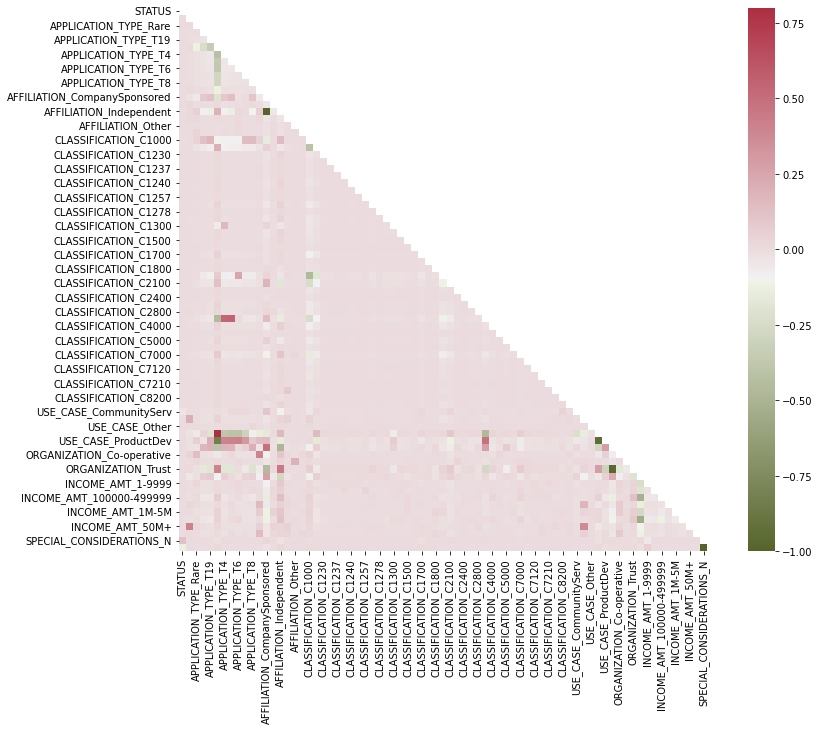

In [19]:
# HeatMap Creation 
cor = scaled_train_df.corr()

# Create a mask
mask = np.triu(np.ones_like(cor, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(12,10))

sns.heatmap(cor, mask=mask, cmap= cmap)

plt.show();

### Removal of Covariant Features 

Based on the heatmap, some variables are reduntant and show co-variance against each other. These Columns will be removed. 

In [20]:
# Removal of Covariance Columns 
# Code snippet taken from krishnaik06 https://github.com/krishnaik06/Complete-Feature-Selection

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [21]:
corr_col = list()

for threshold in [0.6, 0.7, 0.8]:
    covariance = correlation(cor, threshold)
    columns = list(covariance)
    print(f'The number of covariant features is {len(columns)} with a threshold of {threshold}')
    corr_col.append(columns)

The number of covariant features is 13 with a threshold of 0.6
The number of covariant features is 8 with a threshold of 0.7
The number of covariant features is 6 with a threshold of 0.8


### Low Variance Columns 

The final feature selection technique is the removal of low variance columns. 

In [22]:
from sklearn.feature_selection import VarianceThreshold

columns_non_constant = []

for i in [0.005, 0.002, 0.0007]:
  var_thres = VarianceThreshold(threshold= i)
  var_thres.fit(X_train)
  keep = X_train.columns[var_thres.get_support()]
  print(f'The Number of features after Low Var removal: {len(keep)}')
  columns_non_constant.append(keep)

The Number of features after Low Var removal: 33
The Number of features after Low Var removal: 42
The Number of features after Low Var removal: 55


### Feature Selection 

In [23]:
# Removal of covariant features 
remove_corr = list()

for i in range(0, 3):
        
    # Removal of low correlation against Y
    remove_corr.append(corr_against_y[i])
        
    print(f'Number of features after low_correlation removal: {len(corr_against_y[i])}')
        
    for x in range(0, 3):
        # Removal of co-variance features
        co_var = [col for col in corr_against_y[i] if col not in corr_col[x]]
        remove_corr.append(co_var)
        print(f'Number of features after co_var removal: {len(co_var)}')
        
        # Removal of low variance features after co-variance
        low_var = [column for column in co_var if column in columns_non_constant[x]]
        
        ## Append only if there is a difference after removal
        if len(co_var) == len(low_var):
            print('Co Var already removed low_var')
        else:
            remove_corr.append(low_var)
            print(f'Number of features after low_var removal: {len(low_var)}')

Number of features after low_correlation removal: 40
Number of features after co_var removal: 29
Number of features after low_var removal: 16
Number of features after co_var removal: 34
Number of features after low_var removal: 27
Number of features after co_var removal: 36
Co Var already removed low_var
Number of features after low_correlation removal: 60
Number of features after co_var removal: 48
Number of features after low_var removal: 20
Number of features after co_var removal: 53
Number of features after low_var removal: 32
Number of features after co_var removal: 55
Number of features after low_var removal: 43
Number of features after low_correlation removal: 76
Number of features after co_var removal: 63
Number of features after low_var removal: 22
Number of features after co_var removal: 68
Number of features after low_var removal: 35
Number of features after co_var removal: 70
Number of features after low_var removal: 49


### Neural Network (Inputting Feature Selection)
---

In [27]:
from keras.layers import LeakyReLU

def nn_test(range_):

  # For storing results 
  results = {}

  for index in range_:
#   # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#     nn_model = tf.keras.models.Sequential()
#     nn_model.add(tf.keras.layers.Dense(units=36, activation = LeakyReLU(alpha= 0.1), input_dim = len(scaled_train_df[remove_corr[index]].columns)))

#     # First hidden layer
#     nn_model.add(tf.keras.layers.Dense(units=128, activation="swish"))
#     # Second hidden layer
#     nn_model.add(tf.keras.layers.Dense(units=128, activation="gelu"))
#     # Third hidden layer
#     nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))

#     # Output layer
#     nn_model.add(tf.keras.layers.Dense(units= 1, activation="sigmoid"))

#     #Compile Model
#     nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
#     # Stop Early
#     stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
    
#     # Train Model
#     nn_model.fit(scaled_train_df[remove_corr[index]], y_train, epochs = 200, callbacks = [stop_early])
    nn_model = keras.models.load_model(f'FeatureSelection/feature_select_nn_{index}')

    # Evaluate Model
    model_loss, model_accuracy = nn_model.evaluate(scaled_test_df[remove_corr[index]] , y_test, verbose=2) 

#     nn_model.save(f'feature_select_nn_{index}')

    results[index] = {'model_loss': model_loss, 'model_accuracy': model_accuracy}
 
  return results 

In [28]:
range_ = [i for i in range(0, 20)]

In [29]:
corr_remove_test = nn_test(range_ = range_)

215/215 - 0s - loss: 0.5850 - accuracy: 0.7273 - 457ms/epoch - 2ms/step
215/215 - 0s - loss: 0.5886 - accuracy: 0.7073 - 265ms/epoch - 1ms/step
215/215 - 0s - loss: 0.5892 - accuracy: 0.7069 - 307ms/epoch - 1ms/step
215/215 - 0s - loss: 0.5775 - accuracy: 0.7241 - 256ms/epoch - 1ms/step
215/215 - 0s - loss: 0.5868 - accuracy: 0.7235 - 242ms/epoch - 1ms/step
215/215 - 0s - loss: 0.5844 - accuracy: 0.7264 - 234ms/epoch - 1ms/step
215/215 - 0s - loss: 0.5858 - accuracy: 0.7283 - 229ms/epoch - 1ms/step
215/215 - 0s - loss: 0.5811 - accuracy: 0.7102 - 290ms/epoch - 1ms/step
215/215 - 0s - loss: 0.5837 - accuracy: 0.7102 - 313ms/epoch - 1ms/step
215/215 - 0s - loss: 0.5764 - accuracy: 0.7257 - 295ms/epoch - 1ms/step
215/215 - 0s - loss: 0.5852 - accuracy: 0.7257 - 239ms/epoch - 1ms/step
215/215 - 1s - loss: 0.5992 - accuracy: 0.7303 - 523ms/epoch - 2ms/step
215/215 - 0s - loss: 0.5855 - accuracy: 0.7276 - 231ms/epoch - 1ms/step
215/215 - 0s - loss: 0.6182 - accuracy: 0.7294 - 263ms/epoch - 1

In [30]:
# Number of Features 
length = pd.DataFrame([len(x) for x in remove_corr], columns = ['Number of Features'])

In [31]:
# Top Models after Feature Selection 
best = pd.DataFrame(corr_remove_test).transpose().sort_values(by = 'model_accuracy', ascending = False).head(3)
best = pd.merge(best, length, left_index = True, right_index = True)
best.head()

,model_loss,model_accuracy,Number of Features
18,0.604524,0.733673,70
19,0.569740,0.730758,49
11,0.599244,0.730321,55


### Export Top Optimized Models 

In [32]:
for index in best.index:
    model = keras.models.load_model(f'FeatureSelection/feature_select_nn_{index}')
    model.save(f'Models/Optimized_model_{index}.h5')

### HyperOptimization for top Model

In [33]:
best_features = remove_corr[19]

Model #19 was chosen as the top model, although it has a slightly lower accuracy. The tradeoff of twenty less features waws deemed significant enough. 

### Top Model

In [34]:
 # New Sequential model with hyperparameter options
def create_model(hp):
    
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu', 'tanh', 'swish', 'gelu', 'sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=256,
        step=7), activation= activation, input_dim= len(best_features)))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=32,
            max_value=256,
            step=16),
            activation=activation))
    
    # optimizer 
    Optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', values = [1.0, 0.1, 0.01, 0.001, 0.0001]))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation= hp.Choice('activation', ['sigmoid', 'tanh'])))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer = Optimizer, metrics=["accuracy"])
    
    return nn_model

In [35]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective= "val_accuracy",
    max_epochs= 100,
    directory = 'saved',
    project_name = 'nn_tune_final',
    overwrite = False,
    hyperband_iterations= 2)

INFO:tensorflow:Reloading Tuner from saved/nn_tune_final/tuner0.json


In [36]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

tuner.search(scaled_train_df[best_features] ,y_train, 
             epochs = 50, 
             validation_data= (scaled_test_df[best_features],y_test), callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit


In [45]:
# Getting Best Parameters
best_params = tuner.get_best_hyperparameters(num_trials=1)[0]
best_params.values

{'activation': 'gelu',
 'first_units': 43,
 'num_layers': 3,
 'units_0': 96,
 'learning_rate': 0.001,
 'units_1': 48,
 'units_2': 224,
 'units_3': 96,
 'units_4': 208,
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 4,
 'tuner/round': 4,
 'tuner/trial_id': '0396'}

In [37]:
# Training Mdoel Again 
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(scaled_test_df[best_features],y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5798 - accuracy: 0.7340 - 357ms/epoch - 2ms/step
Loss: 0.5798496007919312, Accuracy: 0.7339650392532349


In [38]:
# Isolating y_pred
y_pred = best_model.predict(scaled_test_df[best_features]).ravel()
y_pred = pd.Series(y_pred).apply(lambda x: 1 if x >= 0.5 else 0)

215/215 [==============================] - 0s 649us/step


In [39]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)

# Calculating the accuracy score
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,2098,1109
Actual 1,716,2937


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      3207
           1       0.73      0.80      0.76      3653

    accuracy                           0.73      6860
   macro avg       0.74      0.73      0.73      6860
weighted avg       0.74      0.73      0.73      6860



In [46]:
best_model.save('Models/HyperOps19.h5')

## Results after Feature Selection and Hyper-Optimization

After future selection & hyper-optimization, the best model presented has an accuracy of 73.4% and is short of the 75% threshold for the project. 

### Potential addition of name into model

Another attempt is to add the organizational names into the features from the original dataset (this was removed earlier) to boost the model's performance. However, this addition would risk infomation leakage and overfitting and questions the generalizability of the model to unseen customer names. 

## Adding Back Organizational Names

In [47]:
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head(3)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [48]:
application_df.drop('EIN', axis = 1, inplace = True)

In [49]:
name_count = application_df['NAME'].value_counts().to_frame()
sum_ = name_count['NAME'].sum()
name_count['PercentageOfTotal'] = name_count['NAME']/sum_
name_count['CUMSUM'] = name_count['PercentageOfTotal'].cumsum()

name_count.head()

,NAME,PercentageOfTotal,CUMSUM
PARENT BOOSTER USA INC,1260,0.036736,0.036736
TOPS CLUB INC,765,0.022304,0.059040
UNITED STATES BOWLING CONGRESS INC,700,0.020409,0.079448
WASHINGTON STATE UNIVERSITY,492,0.014344,0.093793
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,408,0.011895,0.105688


In [50]:
rare_name = name_count[name_count['NAME'] == 1].index.tolist()

for name in rare_name:
    application_df['NAME'] = application_df['NAME'].replace(name, 'Rare_Name')

## Transformations of Previous Step 

In [51]:
# Look at APPLICATION_TYPE value counts for binning
types = application_df.APPLICATION_TYPE.value_counts().to_frame()
types['Percentage'] = types['APPLICATION_TYPE']/types['APPLICATION_TYPE'].sum()
types['CUMSUM'] = types['Percentage'].cumsum()
types

rare = types.index[-8:]

# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

# Replace in dataframe for rare 
for app in rare:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Rare")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

# Look at CLASSIFICATION value counts for binning
classification = application_df.CLASSIFICATION.value_counts().sort_values(ascending = False).to_frame()
classification.head(15)

# You may find it helpful to look at CLASSIFICATION value counts >1
rarity = classification[classification['CLASSIFICATION'] < 5]
rare = rarity.index.tolist()

# Choose a cutoff value and create a list of classifications to be replaced
# Replace in dataframe
for cls in rare:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"rare_class")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

# Isolating Object Catories 
category = application_df.select_dtypes(include='object').columns


# Convert categorical data to numeric with `pd.get_dummies`
cat = pd.get_dummies(application_df[category], drop_first=False)

# Drop original data
application_df.drop(category, axis = 1, inplace = True)
application_df = pd.merge(application_df, cat, left_index = True, right_index = True)

# Split our preprocessed data into our features and target arrays
feature = [col for col in application_df.columns if col != 'IS_SUCCESSFUL']
X = application_df[feature]
Y = application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [52]:
scaled_test_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)
scaled_train_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)

## Neural Network Model with Names 

In [53]:
# from keras.layers import LeakyReLU

# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# nn_model = tf.keras.models.Sequential()

# nn_model.add(tf.keras.layers.Dense(units=31, activation = LeakyReLU(alpha= 1), input_dim = len(scaled_train_df.columns)))

# # First hidden layer
# nn_model.add(tf.keras.layers.Dense(units=128, activation="tanh"))

# # Second hidden layer
# nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))

# # Third hidden layer
# nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))

# # Output layer
# nn_model.add(tf.keras.layers.Dense(units= 1, activation="sigmoid"))

# # Check the structure of the model
# nn_model.summary()

In [54]:
# #Compile Model
# nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
# # Stop Early
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=25)
    
# # Train Model
# nn_model.fit(scaled_train_df, y_train, epochs = 200, callbacks = [stop_early])

In [55]:
# Export our model to HDF5 file
nn_model = keras.models.load_model('Models/nn_with_names.h5')

In [59]:
# Y_Pred from Model
y_pred = nn_model.predict(scaled_test_df).ravel()
y_pred = pd.Series(y_pred).apply(lambda x: 1 if x >= 0.5 else 0)

215/215 [==============================] - 0s 1ms/step


In [56]:
# Eveluating test set 
nn_model.evaluate(scaled_test_df,y_test,verbose=2)

215/215 - 0s - loss: 0.5435 - accuracy: 0.7971 - 334ms/epoch - 2ms/step


[0.5434670448303223, 0.7970845699310303]

In [57]:
# Evaluating train set 
nn_model.evaluate(scaled_train_df,y_train,verbose=2)

858/858 - 1s - loss: 0.3748 - accuracy: 0.8216 - 622ms/epoch - 725us/step


[0.37484484910964966, 0.8216407299041748]

In [60]:
# Classification Report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75      3207
           1       0.75      0.93      0.83      3653

    accuracy                           0.80      6860
   macro avg       0.82      0.79      0.79      6860
weighted avg       0.81      0.80      0.79      6860

